# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

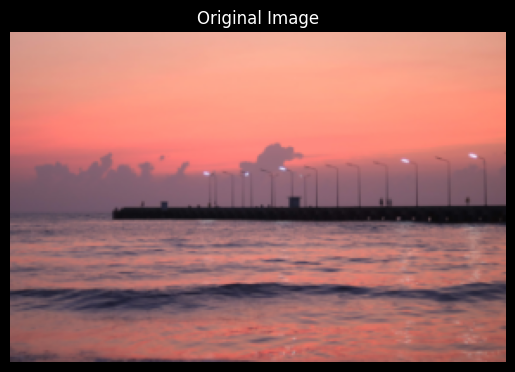

In [49]:
### START CODE HERE ###
img = cv2.imread('assets/sea.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.style.use('dark_background')
plt.title('Original Image')
plt.axis('off')
plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [4]:
### START CODE HERE ###
def plot_histogram(image):

    R = cv2.calcHist([image],[0],None,[256],[0,256])
    G = cv2.calcHist([image],[1],None,[256],[0,256])
    B = cv2.calcHist([image],[2],None,[256],[0,256])

    hist = [R, G, B]
    
    fig = plt.figure(figsize=(12, 4))
    axs = fig.subplots(1, 2)

    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off') 

    axs[1].set_title('Original RGB Histogram')
    axs[1].plot(R, label="Red", color='red')
    axs[1].plot(G, label="Green", color='green')
    axs[1].plot(B, label="Blue", color='blue')
    axs[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

    return hist
    
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

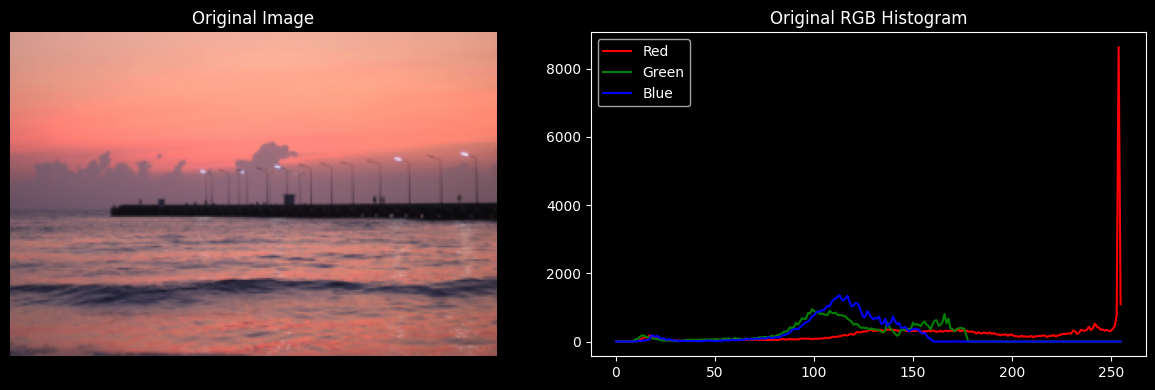

In [ ]:
### START CODE HERE ###

hist_original = plot_histogram(img)

### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

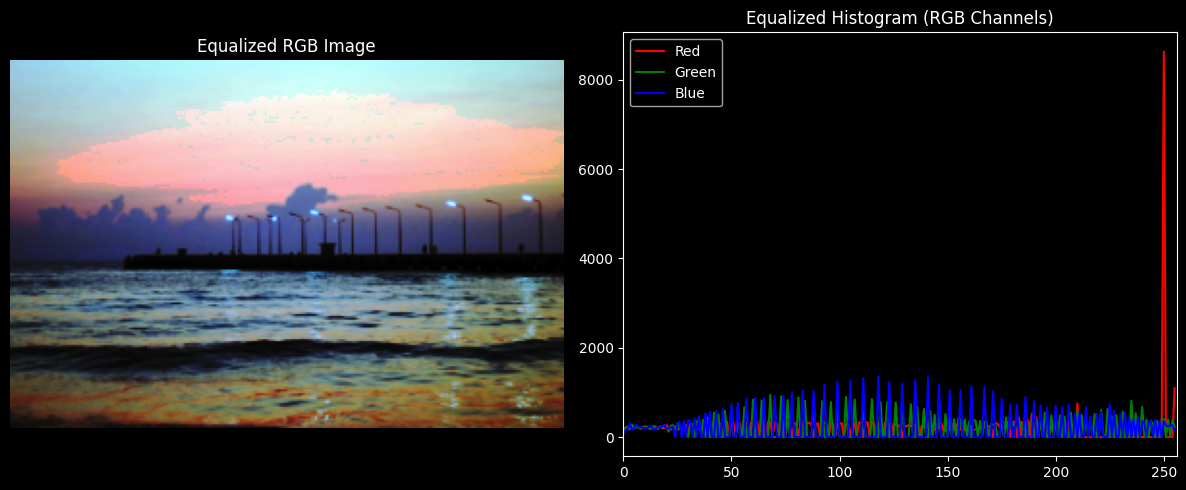

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def equalize_color_image(image):

    # แยก channel
    R, G, B = cv2.split(image)

    # Equalize แต่ละช่อง
    R_eq = cv2.equalizeHist(R)
    G_eq = cv2.equalizeHist(G)
    B_eq = cv2.equalizeHist(B)

    # รวมกลับมาเป็นภาพเดียว
    equalized_img = cv2.merge([R_eq, G_eq, B_eq])
  
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # รูปภาพที่ถูก equalize
    axs[0].imshow(equalized_img)
    axs[0].set_title('Equalized RGB Image')
    axs[0].axis('off')

    # Histogram ของแต่ละ channel
    axs[1].set_title('Equalized Histogram (RGB Channels)')
    axs[1].plot(cv2.calcHist([R_eq], [0], None, [256], [0, 256]), color='r', label='Red')
    axs[1].plot(cv2.calcHist([G_eq], [0], None, [256], [0, 256]), color='g', label='Green')
    axs[1].plot(cv2.calcHist([B_eq], [0], None, [256], [0, 256]), color='b', label='Blue')
    axs[1].legend()
    axs[1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

equalize_color_image(img)


## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [ ]:
### START CODE HERE ###


img1 = cv2.imread('assets/sea.png')
img2 = cv2.imread('assets/wave.png')


### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

In [ ]:
### START CODE HERE ###


















### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

In [ ]:
### START CODE HERE ###










### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?

## **Answer**
1. ถ้าฮิสโตแกรมมีค่าความเข้มของพิกเซลรวมกันอยู่ที่ระดับสูง (เช่น ใกล้ค่า 255) ภาพที่แสดงออกมาจะดูสว่างมาก หรือเกือบขาว 
2. ต้องใช้ template ที่มีพิกเซลทั้งมืดและสว่างอย่างสมดุล เพื่อให้การจับคู่ฮิสโตแกรมช่วย "ยืด" ค่าความสว่างของภาพเป้าหมายให้สมดุลมากขึ้น
3. ใช้ Histogram Compression ช่วยลดช่วงของค่า intensity ให้แคบลง ทำให้ contrast น้อยลง ทำให้ส่วนที่มืดหรือส่วนที่สว่างเกิน มีความมืดและสว่างลดน้อยลง